In [5]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

print("X.shape: %s y.shape: %s" % (str(X.shape), str(y.shape)))
print("num_classes: %d" % len(np.unique(y)))

X.shape: (150, 4) y.shape: (150,)
num_classes: 3


### Exemplo de SVC
- kernel="rbf" é o padrão

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("X_train.shape: %s y_train.shape: %s" % (str(X_train.shape), str(y_train.shape)))
print("X_test.shape: %s y_test.shape: %s" % (str(X_test.shape), str(y_test.shape)))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.shape: (120, 4) y_train.shape: (120,)
X_test.shape: (30, 4) y_test.shape: (30,)


In [13]:
svc_linear = SVC()
svc_linear.fit(X_train_scaled, y_train)

y_pred = svc_linear.predict(X_test_scaled)

print("accuracy: %f" % accuracy_score(y_test, y_pred))

accuracy: 0.966667


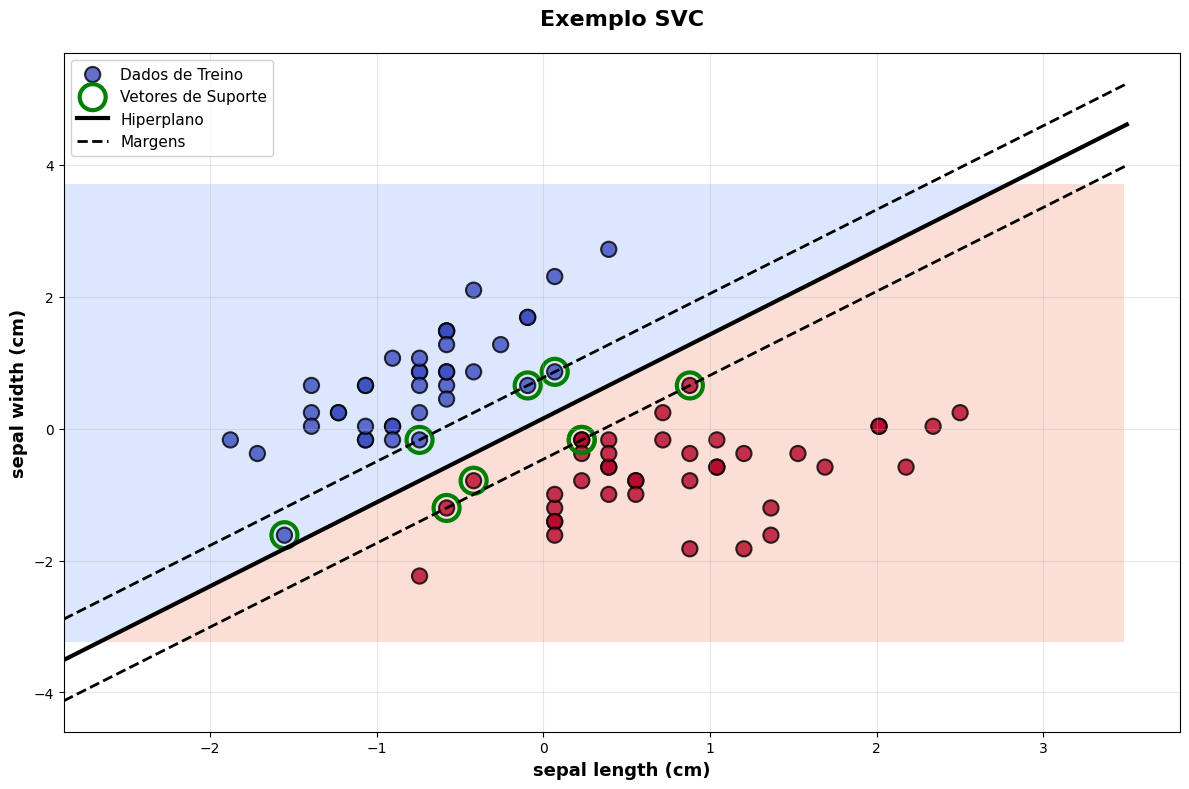

In [ ]:
plt.figure(figsize=(12, 8))

x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm", levels=[-0.5, 0.5, 1.5])

scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
                      c=y_train, cmap="coolwarm", s=120, 
                      edgecolors="black", linewidth=1.5, alpha=0.8,
                      label="Dados de Treino")

support_vectors = svc_linear.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
           s=350, linewidth=3, facecolors="none", 
           edgecolors="green", label="Vetores de Suporte")

w = svc_linear.coef_[0]
b = svc_linear.intercept_[0]
x_plot = np.linspace(x_min, x_max, 100)

y_plot = -(w[0] * x_plot + b) / w[1]

margin_up = -(w[0] * x_plot + b - 1) / w[1]
margin_down = -(w[0] * x_plot + b + 1) / w[1]

plt.plot(x_plot, y_plot, "k-", linewidth=3, label="Hiperplano")
plt.plot(x_plot, margin_up, "k--", linewidth=2, label="Margens")
plt.plot(x_plot, margin_down, "k--", linewidth=2)

plt.xlabel(iris.feature_names[0], fontsize=13, fontweight="bold")
plt.ylabel(iris.feature_names[1], fontsize=13, fontweight="bold")
plt.title("Exemplo SVC", fontsize=16, fontweight="bold", pad=20)
plt.legend(loc="upper left", fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Exemplo de SVR

In [7]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

print("X.shape: %s y.shape: %s" % (str(X.shape), str(y.shape)))
print("targets: ")
print(y)

X.shape: (442, 10) y.shape: (442,)
targets: 
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [6]:
y_pred_train = svr_model.predict(X_train_scaled)
y_pred_test = svr_model.predict(X_test_scaled)
print("treino")
print("MSE: %f" % mean_squared_error(y_train, y_pred_train))
print("MAE: %f" % mean_absolute_error(y_train, y_pred_train))
print("R²: %f" % r2_score(y_train, y_pred_train))

print("teste:")
print("MSE: %f" % mean_squared_error(y_test, y_pred_test))
print("MAE: %f" % mean_absolute_error(y_test, y_pred_test))
print("R²: %f" % r2_score(y_test, y_pred_test))

treino
MSE: 5061.813436
MAE: 58.681455
R²: 0.166971
teste:
MSE: 4332.738479
MAE: 56.029473
R²: 0.182217
